## Lab 3: Cleaning and Analysis of Books Dataset


# Table of Contents 
<ol start="1">
<li> Loading and Cleaning with Pandas</li>
<li> Asking Questions?  </li>
<li> Parsing and Completing the Dataframe  </li>
<li> Determining the Best Books  </li>
<li>Trends in Popularity of Genres </li>
</ol>


## Part 1: Loading and Cleaning with Pandas 
Read in the `goodreads.csv` file, examine the data, and do any necessary data cleaning. 

Here is a description of the columns (in order) present in this csv file:

```
rating: the average rating on a 1-5 scale achieved by the book
review_count: the number of Goodreads users who reviewed this book
isbn: the ISBN code for the book
booktype: an internal Goodreads identifier for the book
author_url: the Goodreads (relative) URL for the author of the book
year: the year the book was published
genre_urls: a string with '|' separated relative URLS of Goodreads genre pages
dir: a directory identifier internal to the scraping code
rating_count: the number of ratings for this book (this is different from the number of reviews)
name: the name of the book
```

Load the appropriate libraries

In [3]:
#write your solution here
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re
import math
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

### Cleaning: Reading in the data
We read in and clean the data from `goodreads.csv`.  Try directly loading the data from file and see what the dataframe look like. What's the problem with naively loading the data as is? You might want to open the CSV file in Excel or your favorite text editor to see how this dataset is formatted.

In [4]:
#Read the data into a dataframe
#Inser your code

df = pd.read_csv("goodreads.csv")
#Examine the first couple of rows of the dataframe
####### 
#   Insert your code
df.head()



4.40 136455  0439023483  good_reads:book https://www.goodreads.com/author/show/153394.Suzanne_Collins    2008 /genres/young-adult|/genres/science-fiction|/genres/dystopia|/genres/fantasy|/genres/science-fiction|/genres/romance|/genres/adventure|/genres/book-club|/genres/young-adult|/genres/teen|/genres/apocalyptic|/genres/post-apocalyptic|/genres/action                dir01/2767052-the-hunger-games.html  2958974            The Hunger Games (The Hunger Games, #1)
0  4.41  16648  0439358078  good_reads:book  https://www.goodreads.com/author/show/1077326....            2003.0  /genres/fantasy|/genres/young-adult|/genres/fi...                                                                                                                                                                                                     dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...  1284478  Harry Potter and the Order of the Phoenix (Har...
1  3.56  85746  0316015849  good_reads:book  https://www.goodreads.com/author/show/941441.S...            2005.0  /genres/young-adult|/genres/fantasy|/genres/ro...                                                                                                                                                                                                                             dir01/41865.Twilight.html  2579564                            Twilight (Twilight, #1)
2  4.23  47906  0061120081  good_reads:book  https://www.goodreads.com/author/show/1825.Har...            1960.0  /genres/classics|/genres/fiction|/genres/histo...                                                                                                                                                                                                                 dir01/2657.To_Kill_a_Mockingbird.html  2078123                              To Kill a Mockingbird
3  4.23  34772  0679783261  good_reads:book  https://www.goodreads.com/author/show/1265.Jan...            1813.0  /genres/classics|/genres/fiction|/genres/roman...                                                                                                                                                                                                                   dir01/1885.Pride_and_Prejudice.html  1388992                                Pride and Prejudice
4  4.25  12363  0446675539  good_reads:book  https://www.goodreads.com/author/show/11081.Ma...            1936.0  /genres/classics|/genres/historical-fiction|/g...                                                                                                                                                                                                                   dir01/18405.Gone_with_the_Wind.html   645470                                 Gone with the Wind

Lets read the csv file with custom column descriptions specified in the problem statement.

In [5]:
#Read the data into a dataframe specifying column names
df=pd.read_csv("goodreads.csv", header=None,
               names=["rating", 'review_count', 'isbn', 'booktype','author_url', 'year', 'genre_urls', 'dir','rating_count', 'name'],
)


#Examine the first couple of rows of the dataframe
df.head()

rating review_count        isbn         booktype                                         author_url    year                                         genre_urls                                                dir rating_count                                               name
0    4.40       136455  0439023483  good_reads:book  https://www.goodreads.com/author/show/153394.S...  2008.0  /genres/young-adult|/genres/science-fiction|/g...                dir01/2767052-the-hunger-games.html      2958974            The Hunger Games (The Hunger Games, #1)
1    4.41        16648  0439358078  good_reads:book  https://www.goodreads.com/author/show/1077326....  2003.0  /genres/fantasy|/genres/young-adult|/genres/fi...  dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...      1284478  Harry Potter and the Order of the Phoenix (Har...
2    3.56        85746  0316015849  good_reads:book  https://www.goodreads.com/author/show/941441.S...  2005.0  /genres/young-adult|/genres/fantasy|/genres/ro...                          dir01/41865.Twilight.html      2579564                            Twilight (Twilight, #1)
3    4.23        47906  0061120081  good_reads:book  https://www.goodreads.com/author/show/1825.Har...  1960.0  /genres/classics|/genres/fiction|/genres/histo...              dir01/2657.To_Kill_a_Mockingbird.html      2078123                              To Kill a Mockingbird
4    4.23        34772  0679783261  good_reads:book  https://www.goodreads.com/author/show/1265.Jan...  1813.0  /genres/classics|/genres/fiction|/genres/roman...                dir01/1885.Pride_and_Prejudice.html      1388992                                Pride and Prejudice


### Cleaning: Examing the dataframe - quick checks

We should examine the dataframe to get a overall sense of the content.

In [6]:
#Start by check the column data types
df.dtypes



rating          float64
review_count     object
isbn             object
booktype         object
author_url       object
year            float64
genre_urls       object
dir              object
rating_count     object
name             object
dtype: object

There are a couple more quick sanity checks to perform on the dataframe. 

In [7]:
#Come up with a few other important properties of the dataframe to check
####### 
print(df.shape)
df.columns


(6000, 10)


Index(['rating', 'review_count', 'isbn', 'booktype', 'author_url', 'year', 'genre_urls', 'dir', 'rating_count', 'name'], dtype='object')

**Question:** Was the data read correctly and values represented as we expected?

Answer : Yes it was read correctly and values are also represented as we have expected.

### Cleaning: Examining the dataframe - a deeper look

Beyond performing checking some quick general properties of the data frame and looking at the first $n$ rows, we can dig a bit deeper into the values being stored. If you haven't already, check to see if there are any missing values in the data frame.

In [8]:
#Get a sense of how many missing values there are in the dataframe.
df.isna().sum()


rating            2
review_count      0
isbn            475
booktype          0
author_url        0
year              7
genre_urls       62
dir               0
rating_count      0
name              0
dtype: int64

In [9]:
#Try to locate where the missing values occur
df[df.rating.isna()]



rating review_count  isbn booktype author_url  year genre_urls                              dir rating_count  name
3643     NaN         None  None     None       None   NaN        NaN  dir37/9658936-harry-potter.html         None  None
5282     NaN         None  None     None       None   NaN        NaN     dir53/113138.The_Winner.html         None  None

How does `pandas` or `numpy` handle missing values when we try to compute with data sets that include them?

dropna() which drops all the NaN, None values.


In [10]:
df[df.year.isnull()]


rating review_count        isbn         booktype                                         author_url  year                                         genre_urls                                                dir rating_count                                               name
2442    4.23          526         NaN  good_reads:book  https://www.goodreads.com/author/show/623606.A...   NaN  /genres/religion|/genres/islam|/genres/non-fic...                       dir25/1301625.La_Tahzan.html         4134                                          La Tahzan
2869    4.61            2         NaN  good_reads:book  https://www.goodreads.com/author/show/8182217....   NaN                                                NaN  dir29/22031070-my-death-experiences---a-preach...           23  My Death Experiences - A Preacherâs 18 Apoca...
3643     NaN         None        None             None                                               None   NaN                                                NaN                    dir37/9658936-harry-potter.html         None                                               None
5282     NaN         None        None             None                                               None   NaN                                                NaN                       dir53/113138.The_Winner.html         None                                               None
5572    3.71           35  8423336603  good_reads:book  https://www.goodreads.com/author/show/285658.E...   NaN                                    /genres/fiction  dir56/890680._rase_una_vez_el_amor_pero_tuve_q...          403  Ãrase una vez el amor pero tuve que matarlo. ...
5658    4.32           44         NaN  good_reads:book  https://www.goodreads.com/author/show/25307.Ro...   NaN  /genres/fantasy|/genres/fantasy|/genres/epic-f...  dir57/5533041-assassin-s-apprentice-royal-assa...         3850  Assassin's Apprentice / Royal Assassin (Farsee...
5683    4.56          204         NaN  good_reads:book  https://www.goodreads.com/author/show/3097905....   NaN  /genres/fantasy|/genres/young-adult|/genres/ro...                  dir57/12474623-tiger-s-dream.html          895                 Tiger's Dream (The Tiger Saga, #5)

### Cleaning: Dealing with Missing Values
How should we interpret 'missing' or 'invalid' values in the data (hint: look at where these values occur)? One approach is to simply exclude them from the dataframe. Is this appropriate for all 'missing' or 'invalid' values? How would you drop these values from the dataframe (hint: is it possible to eliminate just a single entry in your dataframe? Should you eliminate an entire row? Or column?)?

In [11]:
#Treat the missing or invalid values in your dataframe
df = df[df.year.notnull()]



Ok so we have done some cleaning. Is it enough? 

In [12]:
#Check the column data types again
df.dtypes



rating          float64
review_count     object
isbn             object
booktype         object
author_url       object
year            float64
genre_urls       object
dir              object
rating_count     object
name             object
dtype: object

Notice the float has not yet changed.
Ok so lets fix those types. If the type conversion fails, we now know we have further problems.

In [13]:
#Convert rating_count, review_count and year to int 
print(np.sum(df.year.isnull()))
print(np.sum(df.rating_count.isnull())) 
print(np.sum(df.review_count.isnull())) 
# We removed seven rows
df.shape

0
0
0


(5993, 10)

In [14]:
df.isna().sum()


rating            0
review_count      0
isbn            471
booktype          0
author_url        0
year              0
genre_urls       59
dir               0
rating_count      0
name              0
dtype: int64

Final check

Some of the other colums that should be strings have NaN. 

In [15]:
df.rating_count=df.rating_count.astype(int)
df.review_count=df.review_count.astype(int)
df.year=df.year.astype(int)

In [16]:
df.dtypes


rating          float64
review_count      int64
isbn             object
booktype         object
author_url       object
year              int64
genre_urls       object
dir              object
rating_count      int64
name             object
dtype: object

In [17]:
#Insert Your code here
df.loc[df.genre_urls.isnull(), 'genre_urls']=""
df.loc[df.isbn.isnull(), 'isbn']=""

##  Part 2: Asking Questions
Think of few questions we want to ask and then examine the data and decide if the dataframe contains what you need to address these questions. 

**Example:** Which are the highest rated books? To determine this, you'll only need the data in two columns: `name` and `rating`. The task will be to sort these two columns by the value in `rating`.


---

##  Part 3: Parsing and Completing the Data Frame 

We will need author and genre to proceed! Parse the `author` column from the author_url and `genres` column from the genre_urls. Keep the `genres` column as a string separated by '|'.

Hint: Use panda's `map` to assign new columns to the dataframe.  


---

Examine an example `author_url` and reason about which sequence of string operations must be performed in order to isolate the author's name.

In [18]:
#Get the first author_url
test_string = df.author_url[0]
test_string


'https://www.goodreads.com/author/show/153394.Suzanne_Collins'

In [19]:
#Test out some string operations to isolate the author name
author = test_string.split(".")[-1]
author


'Suzanne_Collins'

In [20]:
#Write a function that accepts an author url and returns the author's name based on your experimentation above
def get_author(url):
    # your code here
    name = url.split(".")[-1]
    ####### 
    return name
#Apply the get_author function to the 'author_url' column using '.map' 
#and add a new column 'author' to store the names
df['author'] = df.author_url.map(get_author)
df.author[0:5]


0    Suzanne_Collins
1        J_K_Rowling
2    Stephenie_Meyer
3         Harper_Lee
4        Jane_Austen
Name: author, dtype: object

Now parse out the genres from `genre_url`.  Like with the authors, we'll assign a new `genres` column to the dataframe.

This is a little more complicated because there be more than one genre.

In [21]:
#Get first genre_url
df.genre_urls.head()


0    /genres/young-adult|/genres/science-fiction|/g...
1    /genres/fantasy|/genres/young-adult|/genres/fi...
2    /genres/young-adult|/genres/fantasy|/genres/ro...
3    /genres/classics|/genres/fiction|/genres/histo...
4    /genres/classics|/genres/fiction|/genres/roman...
Name: genre_urls, dtype: object

In [22]:
#Test out some string operations to isolate the genres
test_genre_string=df.genre_urls[0]
genres=test_genre_string.strip().split('|')
for e in genres:
    print(e.split('/')[-1])
    "|".join(genres)

young-adult
science-fiction
dystopia
fantasy
science-fiction
romance
adventure
book-club
young-adult
teen
apocalyptic
post-apocalyptic
action


In [23]:
#Write a function that accepts a genre url and returns the genre name based on your experimentation above
def split_and_join_genres(url):
    # your code here
    genres=url.strip().split('|')
    genres=[e.split('/')[-1] for e in genres]
    return "|".join(genres)


In [24]:
split_and_join_genres("/genres/young-adult|/genres/science-fiction")


'young-adult|science-fiction'

In [25]:
split_and_join_genres("")


''

In [26]:
split_and_join_genres("/genres/fantasy|/genres/young-adult|")

'fantasy|young-adult|'

In [27]:
df['genres']=df.genre_urls.map(split_and_join_genres)
df.head()

rating  review_count        isbn         booktype                                         author_url  year                                         genre_urls                                                dir  rating_count                                               name           author                                             genres
0    4.40        136455  0439023483  good_reads:book  https://www.goodreads.com/author/show/153394.S...  2008  /genres/young-adult|/genres/science-fiction|/g...                dir01/2767052-the-hunger-games.html       2958974            The Hunger Games (The Hunger Games, #1)  Suzanne_Collins  young-adult|science-fiction|dystopia|fantasy|s...
1    4.41         16648  0439358078  good_reads:book  https://www.goodreads.com/author/show/1077326....  2003  /genres/fantasy|/genres/young-adult|/genres/fi...  dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...       1284478  Harry Potter and the Order of the Phoenix (Har...      J_K_Rowling  fantasy|young-adult|fiction|fantasy|magic|chil...
2    3.56         85746  0316015849  good_reads:book  https://www.goodreads.com/author/show/941441.S...  2005  /genres/young-adult|/genres/fantasy|/genres/ro...                          dir01/41865.Twilight.html       2579564                            Twilight (Twilight, #1)  Stephenie_Meyer  young-adult|fantasy|romance|paranormal|vampire...
3    4.23         47906  0061120081  good_reads:book  https://www.goodreads.com/author/show/1825.Har...  1960  /genres/classics|/genres/fiction|/genres/histo...              dir01/2657.To_Kill_a_Mockingbird.html       2078123                              To Kill a Mockingbird       Harper_Lee  classics|fiction|historical-fiction|academic|s...
4    4.23         34772  0679783261  good_reads:book  https://www.goodreads.com/author/show/1265.Jan...  1813  /genres/classics|/genres/fiction|/genres/roman...                dir01/1885.Pride_and_Prejudice.html       1388992                                Pride and Prejudice      Jane_Austen  classics|fiction|romance|historical-fiction|li...

In [28]:
df[df.author == "Marguerite_Yourcenar"]


rating  review_count        isbn         booktype                                         author_url  year                                         genre_urls                                  dir  rating_count                name                author                                             genres
1014    4.23           483  0374529264  good_reads:book  https://www.goodreads.com/author/show/7732.Mar...  1951  /genres/historical-fiction|/genres/fiction|/ge...  dir11/12172.Memoirs_of_Hadrian.html          6258  Memoirs of Hadrian  Marguerite_Yourcenar  historical-fiction|fiction|cultural|france|cla...
5620    4.11            74  2070367983  good_reads:book  https://www.goodreads.com/author/show/7732.Mar...  1968  /genres/fiction|/genres/historical-fiction|/ge...     dir57/953435.L_uvre_au_noir.html          1601    L'Åuvre au noir  Marguerite_Yourcenar  fiction|historical-fiction|cultural|france|eur...

In [29]:
del df['genre_urls']


---

In [30]:
df.to_csv("cleaned-goodreads.csv", index=False, header=True)


In [31]:
df

rating  review_count        isbn         booktype                                         author_url  year                                                dir  rating_count                                               name           author                                             genres
0       4.40        136455  0439023483  good_reads:book  https://www.goodreads.com/author/show/153394.S...  2008                dir01/2767052-the-hunger-games.html       2958974            The Hunger Games (The Hunger Games, #1)  Suzanne_Collins  young-adult|science-fiction|dystopia|fantasy|s...
1       4.41         16648  0439358078  good_reads:book  https://www.goodreads.com/author/show/1077326....  2003  dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...       1284478  Harry Potter and the Order of the Phoenix (Har...      J_K_Rowling  fantasy|young-adult|fiction|fantasy|magic|chil...
2       3.56         85746  0316015849  good_reads:book  https://www.goodreads.com/author/show/941441.S...  2005                          dir01/41865.Twilight.html       2579564                            Twilight (Twilight, #1)  Stephenie_Meyer  young-adult|fantasy|romance|paranormal|vampire...
3       4.23         47906  0061120081  good_reads:book  https://www.goodreads.com/author/show/1825.Har...  1960              dir01/2657.To_Kill_a_Mockingbird.html       2078123                              To Kill a Mockingbird       Harper_Lee  classics|fiction|historical-fiction|academic|s...
4       4.23         34772  0679783261  good_reads:book  https://www.goodreads.com/author/show/1265.Jan...  1813                dir01/1885.Pride_and_Prejudice.html       1388992                                Pride and Prejudice      Jane_Austen  classics|fiction|romance|historical-fiction|li...
...      ...           ...         ...              ...                                                ...   ...                                                ...           ...                                                ...              ...                                                ...
5995    4.17          2226  0767913736  good_reads:book  https://www.goodreads.com/author/show/44565.Ca...  2005                dir60/78508.The_River_of_Doubt.html         16618                                 The River of Doubt  Candice_Millard  history|non-fiction|biography|adventure|book-c...
5996    3.99           775  1416909427  good_reads:book  https://www.goodreads.com/author/show/151371.J...  2006                             dir60/259068.Shug.html          6179                                               Shug        Jenny_Han  young-adult|realistic-fiction|romance|contempo...
5997    3.78           540  1620612321  good_reads:book  https://www.goodreads.com/author/show/5761314....  2012                         dir60/13503247-flawed.html          2971                                             Flawed     Kate_Avelynn  contemporary|romance|young-adult|sociology|abu...
5998    3.91           281              good_reads:book  https://www.goodreads.com/author/show/1201952....  2006                                 dir60/2750008.html          3083              Ø£Ø³Ø¹Ø¯ Ø§Ù
Ø±Ø£Ø© ÙÙ Ø§ÙØ¹Ø§ÙÙ
    A_id_al_Qarni  religion|islam|religion|self-help|spirituality...
5999    4.35            61  0786929081  good_reads:book  https://www.goodreads.com/author/show/1023510....  2001  dir60/66677.Legacy_of_the_Drow_Collector_s_Edi...          3982  Legacy of the Drow Collector's Edition (Legacy...    R_A_Salvatore  fiction|fantasy|magic|science-fiction-fantasy|...

[5993 rows x 11 columns]

## 4. EDA 


## Part 4:  Determining the Best Books 

This is an example of an analysis of the "grouped property" type.

Think of some reasonable definitions of what it could mean to be a "best book."
 

---

For example, we can determine the "best book" by year! Determine the best books in each year from 2000

In [32]:
#Deterime best book each year based on rating. 
for year, subset in df.groupby('year'):
    #Find the best book of the year

    bestbook = subset[subset.rating == subset.rating.max()]
    if bestbook.shape[0] > 1:
        print(year, bestbook.name.values, bestbook.rating.values)
    else:
        print(year, bestbook.name.values[0], bestbook.rating.values[0])
    
        

-1500 The Epic of Gilgamesh 3.6
-800 The Iliad/The Odyssey 4.01
-560 Aesop's Fables 4.03
-512 The Art of War 3.92
-500 The Bhagavad Gita 4.06
-458 The Oresteia 3.96
-442 Antigone 3.52
-440 The Histories 3.94
-431 Medea 3.8
-429 Oedipus Rex 3.64
-411 The History of the Peloponnesian War 3.84
-400 Complete Works 4.3
-390 Apology 4.11
-380 The Republic 3.85
-370 The Symposium 3.99
-360 Five Dialogues 4.07
-350 The Nicomachean Ethics 3.88
-29 The Aeneid 3.77
4 The Seven Spiritual Laws of Success 4.04
8 Metamorphoses 4.01
13 The Day Jesus Rode Into Croydon 3.85
100 The New Oxford Annotated Bible, New Revised Standard Version 4.3
121 The Twelve Caesars 4.02
130 Holy Bible 4.45
158 The Golden Ass 3.88
174 Meditations 4.16
200 The Garden of Eden 3.75
201 Fe Fi FOE Comes 4.37
213 NaÃ¯ve. Super 3.9
397 Confessions 3.82
632 The Quran 4.37
800 Beowulf 3.38
900 The Arabian Nights 4.04
968 La BÃªte humaine (Les Rougon-Macquart, #17) 4.02
1002 The Pillow Book 4.04
1008 The Tale of Genji 3.68
1010 Sha

In [33]:
dfgb_author = df.groupby('author')
type(dfgb_author)

pandas.core.groupby.generic.DataFrameGroupBy

In [34]:
dfgb_author.count()


rating  review_count  isbn  booktype  author_url  year  dir  rating_count  name  genres
author                                                                                                        
A_A_Milne                   6             6     6         6           6     6    6             6     6       6
A_G_Howard                  1             1     1         1           1     1    1             1     1       1
A_J_Cronin                  1             1     1         1           1     1    1             1     1       1
A_J_Jacobs                  1             1     1         1           1     1    1             1     1       1
A_J_Salt                    1             1     1         1           1     1    1             1     1       1
...                       ...           ...   ...       ...         ...   ...  ...           ...   ...     ...
_                          42            42    42        42          42    42   42            42    42      42
_gota_Krist_f               1             1     1         1           1     1    1             1     1       1
_mile_Zola                  4             4     4         4           4     4    4             4     4       4
_ric_Emmanuel_Schmitt       1             1     1         1           1     1    1             1     1       1
_sne_Seierstad              1             1     1         1           1     1    1             1     1       1

[2645 rows x 10 columns]

In [35]:
dfgb_author['author'].count()


author
A_A_Milne                 6
A_G_Howard                1
A_J_Cronin                1
A_J_Jacobs                1
A_J_Salt                  1
                         ..
_                        42
_gota_Krist_f             1
_mile_Zola                4
_ric_Emmanuel_Schmitt     1
_sne_Seierstad            1
Name: author, Length: 2645, dtype: int64

In [36]:

for rating, subset in df.groupby('rating'):
    #Find the best book

    bestbook = subset[subset.rating == subset.rating.max()]
    if bestbook.shape[0] > 1:
        print(rating, bestbook.name.values )
    else:
        print(rating, bestbook.name.values[0])
        


2.0 Revealing Eden (Save the Pearls, #1)
2.77 Lost
2.9 How To Be A Perfect Girl
2.97 Mein Kampf
3.01 The Jane Austen Book Club
3.03 Billy Budd, Sailor
3.05 The Mermaid Chair
3.08 Beatrice and Virgil
3.09 Nightlight
3.12 The Actor and the Housewife
3.15 ['The Red Badge of Courage' '28 Ø\xadØ±Ù\x81']
3.18 Me and Mr. Darcy
3.19 Snakes and Earrings
3.2 ['Cosmopolis' 'The Tesseract']
3.21 ['Her Fearful Symmetry' 'Shanghai Baby'
 'The Prophet of Yonwood (Book of Ember, #3)']
3.22 The Girls' Guide to Hunting and Fishing
3.23 ['A Reliable Wife' 'Scarlett']
3.24 ['The Casual Vacancy' 'Binders Full of Women']
3.25 ['Pride and Prejudice and Zombies (Pride and Prejudice and Zombies, #1)'
 'Wideacre (The Wideacre Trilogy, #1)']
3.28 Clarissa, or, the History of a Young Lady
3.29 ['Ghostgirl (Ghostgirl, #1)'
 'The Claiming of Sleeping Beauty (Sleeping Beauty, #1)']
3.3 Ethan Frome
3.31 ['Love, Lex (The Undergrad Years, #1)' 'Mr. Maybe']
3.32 ['The Scarlet Letter' 'Prep' 'Blue Angel']
3.33 The Pearl


In [37]:
print(bestbook.name)

1718                           An Elephant Is On My House
2145                     A Book About Absolutely Nothing.
2903                Obscured Darkness (Family Secrets #2)
2909                                       Family Secrets
4473                                      Patience's Love
5564                 Untainted (Photographer Trilogy, #3)
5692    Abstraction In Theory - Laws Of Physical Trans...
Name: name, dtype: object


Try this for few other definitions of the "best book" using `.groupby`.

## Part 5:  Trends in Popularity of Genres 

This is an example of an analysis of the "grouped property" type.

There are a lot of questions you could ask about genres.
* Which genre is currently the most popular?
* Better, based on our data, what draw conclusions can you draw about the time evolution of the popularity of each genre?


---

First we need to find the distinct genres in the dataframe. 

To do this, notice that each string is a pipe (|) separated list of genres. For each string, we ask if the genre is in that pipe separated list.  If it is, we return True, else False

**Hint: remember that python sets have unique (non-repeating) items.**

What happens if we add a column to the dataframe for each genre? 

Is this way of representing genre efficient? Allows for easy computation and visualization?

Are there other ways to represent genre information in the dataframe that allow for each visualization?

In [38]:
#Explore different ways to visualize information about the genres in the dataframe
df


rating  review_count        isbn         booktype                                         author_url  year                                                dir  rating_count                                               name           author                                             genres
0       4.40        136455  0439023483  good_reads:book  https://www.goodreads.com/author/show/153394.S...  2008                dir01/2767052-the-hunger-games.html       2958974            The Hunger Games (The Hunger Games, #1)  Suzanne_Collins  young-adult|science-fiction|dystopia|fantasy|s...
1       4.41         16648  0439358078  good_reads:book  https://www.goodreads.com/author/show/1077326....  2003  dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...       1284478  Harry Potter and the Order of the Phoenix (Har...      J_K_Rowling  fantasy|young-adult|fiction|fantasy|magic|chil...
2       3.56         85746  0316015849  good_reads:book  https://www.goodreads.com/author/show/941441.S...  2005                          dir01/41865.Twilight.html       2579564                            Twilight (Twilight, #1)  Stephenie_Meyer  young-adult|fantasy|romance|paranormal|vampire...
3       4.23         47906  0061120081  good_reads:book  https://www.goodreads.com/author/show/1825.Har...  1960              dir01/2657.To_Kill_a_Mockingbird.html       2078123                              To Kill a Mockingbird       Harper_Lee  classics|fiction|historical-fiction|academic|s...
4       4.23         34772  0679783261  good_reads:book  https://www.goodreads.com/author/show/1265.Jan...  1813                dir01/1885.Pride_and_Prejudice.html       1388992                                Pride and Prejudice      Jane_Austen  classics|fiction|romance|historical-fiction|li...
...      ...           ...         ...              ...                                                ...   ...                                                ...           ...                                                ...              ...                                                ...
5995    4.17          2226  0767913736  good_reads:book  https://www.goodreads.com/author/show/44565.Ca...  2005                dir60/78508.The_River_of_Doubt.html         16618                                 The River of Doubt  Candice_Millard  history|non-fiction|biography|adventure|book-c...
5996    3.99           775  1416909427  good_reads:book  https://www.goodreads.com/author/show/151371.J...  2006                             dir60/259068.Shug.html          6179                                               Shug        Jenny_Han  young-adult|realistic-fiction|romance|contempo...
5997    3.78           540  1620612321  good_reads:book  https://www.goodreads.com/author/show/5761314....  2012                         dir60/13503247-flawed.html          2971                                             Flawed     Kate_Avelynn  contemporary|romance|young-adult|sociology|abu...
5998    3.91           281              good_reads:book  https://www.goodreads.com/author/show/1201952....  2006                                 dir60/2750008.html          3083              Ø£Ø³Ø¹Ø¯ Ø§Ù
Ø±Ø£Ø© ÙÙ Ø§ÙØ¹Ø§ÙÙ
    A_id_al_Qarni  religion|islam|religion|self-help|spirituality...
5999    4.35            61  0786929081  good_reads:book  https://www.goodreads.com/author/show/1023510....  2001  dir60/66677.Legacy_of_the_Drow_Collector_s_Edi...          3982  Legacy of the Drow Collector's Edition (Legacy...    R_A_Salvatore  fiction|fantasy|magic|science-fiction-fantasy|...

[5993 rows x 11 columns]

In [43]:
genre_set =set()
for genre in df.genres:
  list_genre=genre.split('|')
  genre_set.update(list_genre)

len(genre_set)

538

In [46]:
for genre in genre_set:
  df[genre] = [genre in row.split('|') for row in df.genres]
  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  


In [48]:
df.shape

(5993, 549)

In [49]:
genre_df = df[list(genre_set)]
genre_df.head()

jewish  international  harlequin  german-literature  mystery-thriller  civil-war  textbooks  surreal  bulgarian-literature  17th-century  holocaust   dark  spy-thriller  interracial-romance  thriller  outdoors  western-romance   race  new-age  star-wars  self-help  brain  united-states  church  beauty-and-the-beast  classic-literature  foodie  technology  high-fantasy  literary-fiction  disability  cookbooks  womens-studies  romantic-suspense  urban-planning  lesbian  clean-romance  \
0  False   False          False      False              False             False      False      False    False                 False         False      False  False         False                False     False     False            False  False    False      False      False  False          False   False                 False               False   False       False         False             False       False      False           False              False           False    False          False   
1  False   False          False      False              False             False      False      False    False                 False         False      False  False         False                False     False     False            False  False    False      False      False  False          False   False                 False               False   False       False         False             False       False      False           False              False           False    False          False   
2  False   False          False      False              False             False      False      False    False                 False         False      False  False         False                False     False     False            False  False    False      False      False  False          False   False                 False               False   False       False         False             False       False      False           False              False           False    False          False   
3  False   False          False      False              False             False      False      False    False                 False         False      False  False         False                False     False     False            False  False    False      False      False  False          False   False                 False               False   False       False         False             False       False      False           False              False           False    False          False   
4  False   False          False      False              False             False      False      False    False                 False         False      False  False         False                False     False     False            False  False    False      False      False  False          False   False                 False                True   False       False         False             False       False      False           False              False           False    False          False   

   americana  psychological-thriller  erotica  young-adult  eastern-philosophy  teachers  latin-american-literature  occult  baseball  favorites  urbanism  drawing  ...  classics  chess  biography  ghosts  dictionaries  gardening  food-writing  media-tie-in  young-adult-historical-fiction  romania  dc-comics    fae  social-issues  travel  israel  politics  mysticism  14th-century  poetry  biology  natural-history  young-adult-contemporary  mystery  government  hungarian-literature  journal  \
0      False                   False    False         True               False     False                      False   False     False      False     False    False  ...     False  False      False   False         False      False         False         False                           False    False      False  False          False   False   False     False      False         False   False    False            False                     False    False       False                 False    False   
1      False 

In [59]:
result=genre_df.sum()
result.sort_values(ascending=False)
result

                     59
jewish               30
international         3
harlequin             2
german-literature    93
                     ..
legal-thriller       14
espionage            57
aliens               54
bizarro-fiction       1
zen                   2
Length: 538, dtype: int64

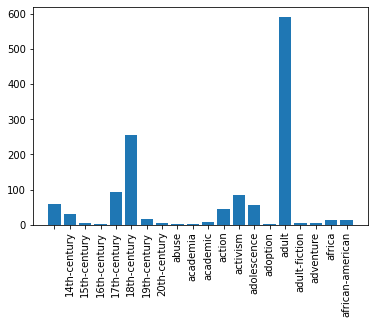

In [63]:
x=sorted(genre_set)[:20]
y=result[:20]
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()